<a href="https://colab.research.google.com/github/NophaieViscente/AnalisandoDadosBrasileirao/blob/main/Analise_de_Dados_Campeonato_Brasileiro_2000_at%C3%A9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importando as bibliotecas e lendo os arqvuivos (.csv)

In [1]:
# Importando as bibliotecas que serão usadas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
# Lendo os arquivos .csv e alocando em dois datasets
df_football = pd.read_csv('/content/drive/MyDrive/brazilian_football_championship_2000to2021.csv',encoding='latin1')
df_stats = pd.read_csv('/content/drive/MyDrive/stats_brazilian_football_championship2015to2021.csv',encoding='latin1')

### Agrupando os datasets. 



In [2]:
# Agrupando o dataset de estatísticas e o das partidas.
full_data = df_football.merge(df_stats,on='ID',how='left')
# Mostrando os arquivos agrupados.
full_data.head(-20)

,ID,Rodada,Data,Horário,Dia,Mandante_x,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor,Mandante_y,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10585,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10586,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,1.0,19.0,6.0,56%,471.0,82%,24.0,4.0,0.0,1.0,3.0
10587,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10588,8314,38,2021-02-25,21:30,Quinta-Feira,Atlético-MG,Palmeiras,Atlético-MG,Mineirão,2,0,MG,SP,MG,1.0,19.0,8.0,52%,451.0,89%,22.0,3.0,0.0,5.0,5.0


#### Editando dados para usar na análise.

In [3]:
# fazendo com que os dados 'Vencedor','Mandante_x','Visitante','Dia' fiquem no mesmo padrão (Maiúsculo).
full_data['Vencedor'] = full_data['Vencedor'].str.upper()
full_data['Mandante_x'] = full_data['Mandante_x'].str.upper()
full_data['Visitante'] = full_data['Visitante'].str.upper()
full_data['Dia'] = full_data['Dia'].str.upper()  

In [4]:
# Trocando dados de empates nas colunas 'Estado Vencedor' e 'Vencedor'
full_data['Estado Vencedor'] = full_data['Estado Vencedor'].replace('-','Empate')
full_data['Vencedor'] = full_data['Vencedor'].replace('-','Empate')

In [5]:
# Trocando tipo dos dados de data . 
full_data['Data'] = pd.to_datetime(full_data['Data'],format='%Y-%m-%d')

In [6]:
# Criando um DataFrame 'vencedor' para ter a contagem de vencedores de forma organizada e sem dados repetidos.
full_data_norepeat = full_data.drop_duplicates(subset='ID',keep='first')
vencedor = pd.DataFrame()
winners = full_data_norepeat['Vencedor'].value_counts()
vencedor['winners'] = winners.index
vencedor['winner_count'] = winners.values
# Retirando os empates.
vencedor.drop(index=0,inplace=True)
vencedor.head(15)

,winners,winner_count
1,SÃO PAULO,366
2,SANTOS,339
3,CRUZEIRO,326
4,INTERNACIONAL,323
5,GRÊMIO,322
6,FLAMENGO,320
7,FLUMINENSE,310
8,CORINTHIANS,309
9,ATHLÉTICO-PR,306
10,ATLÉTICO-MG,302


In [7]:
# Criando novo dataset para alocar dados de 'Vencedores em casa' . 
homeWinners = full_data_norepeat.query('Vencedor == Mandante_x')
vencedorCasa = pd.DataFrame()
winners = homeWinners['Vencedor'].value_counts()
vencedorCasa['winners'] = winners.index
vencedorCasa['winner_count'] = winners.values
vencedorCasa.head(15)

,winners,winner_count
0,SÃO PAULO,230
1,SANTOS,229
2,GRÊMIO,223
3,ATHLÉTICO-PR,218
4,INTERNACIONAL,216
5,ATLÉTICO-MG,207
6,CRUZEIRO,206
7,FLAMENGO,203
8,CORINTHIANS,199
9,FLUMINENSE,197


In [8]:
# Criando novo dataset para alocar dados de 'Vencedores visitantes' . 
awayWinners = full_data_norepeat.query('Vencedor == Visitante')
vencedorVisitante = pd.DataFrame()
winners = awayWinners['Vencedor'].value_counts()
vencedorVisitante['winners'] = winners.index
vencedorVisitante['winner_count'] = winners.values
vencedorVisitante.head(15)

,winners,winner_count
0,SÃO PAULO,136
1,CRUZEIRO,120
2,FLAMENGO,117
3,FLUMINENSE,113
4,CORINTHIANS,110
5,SANTOS,110
6,INTERNACIONAL,107
7,PALMEIRAS,104
8,GRÊMIO,99
9,ATLÉTICO-MG,95


In [9]:
# Criando dataset para alocar os 'empates em casa'
draw = full_data_norepeat.query('Vencedor == "Empate"')
empateCasa = pd.DataFrame()
homeDraw = draw['Mandante_x'].value_counts()
empateCasa['time'] = homeDraw.index
empateCasa['qtd_empates_casa'] = homeDraw.values
empateCasa.head()

,time,qtd_empates_casa
0,FLUMINENSE,106
1,FLAMENGO,104
2,SÃO PAULO,103
3,CORINTHIANS,99
4,SANTOS,99


In [10]:
# Criando dataset para alocar os 'empates fora de casa'
empateFora = pd.DataFrame()
awayDraw = draw['Visitante'].value_counts()
empateFora['time'] = awayDraw.index
empateFora['qtd_empates_casa'] = awayDraw.values
empateFora.head()

,time,qtd_empates_casa
0,CORINTHIANS,111
1,FLAMENGO,108
2,GRÊMIO,108
3,SÃO PAULO,106
4,ATLÉTICO-MG,106


In [11]:
# Criando novo dataSet para alocar os dados de Vencedores com suas Quantidades de gols em casa . 
placarMandante = homeWinners[['Vencedor','Mandante Placar']]
placarMandante = placarMandante.groupby('Vencedor').sum().sort_values('Mandante Placar',ascending=False)
golsMandante = pd.DataFrame()
golsMandante['time'] = placarMandante.index
golsMandante['gols_casa'] = placarMandante.values
golsMandante.head(15)

,time,gols_casa
0,SANTOS,580
1,SÃO PAULO,558
2,ATLÉTICO-MG,519
3,CRUZEIRO,515
4,ATHLÉTICO-PR,512
5,GRÊMIO,507
6,FLAMENGO,486
7,PALMEIRAS,467
8,INTERNACIONAL,465
9,FLUMINENSE,453


In [12]:
# Criando novo dataSet para alocar os dados de Vencedores com suas Quantidades de gols fora de casa . 
placarVisitante = awayWinners[['Vencedor','Visitante Placar']]
placarVisitante = placarVisitante.groupby('Vencedor').sum().sort_values('Visitante Placar',ascending=False)
golsVisitante = pd.DataFrame()
golsVisitante['time'] = placarVisitante.index
golsVisitante['gols_fora'] = placarVisitante.values
golsVisitante.head(15)

,time,gols_fora
0,SÃO PAULO,306
1,CRUZEIRO,266
2,FLUMINENSE,249
3,SANTOS,246
4,FLAMENGO,239
5,CORINTHIANS,231
6,PALMEIRAS,226
7,INTERNACIONAL,224
8,ATLÉTICO-MG,210
9,GRÊMIO,209


In [13]:
# Criando datasets com vencedores dentro e fora de casa por dia da semana.
homeWinnersDia = homeWinners[['Vencedor','Dia']].sort_values('Dia',ascending=True)
awayWinnersDia = awayWinners[['Vencedor','Dia']].sort_values('Dia',ascending=True)

In [14]:
# Capturando datas para criar um novo dataset a partir do que se tem dados de posse de bola, cartões e passes . 
full_data2015fwd = full_data.loc[full_data['Data'] > datetime(2015,1,1)]
full_data2015fwd.drop(['Precisão de passe'],axis=1,inplace=True)
full_data2015fwd.dropna(axis=0)
full_data2015fwd = full_data2015fwd[['ID','Data','Mandante_x','Visitante','Vencedor','Mandante Placar','Visitante Placar','Posse de bola',
                  'Cartões amarelos','Cartões vermelhos','Passes']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
# Retirando símbolo e transformando em valor númerico para usar nos cálculos a 'posse de bola'
lista = []
for linha in full_data2015fwd['Posse de bola'] : 
  lista.append(str(linha).replace('%',''))
full_data2015fwd['Posse de bola'] = lista
full_data2015fwd['Posse de bola'] = pd.to_numeric(full_data2015fwd['Posse de bola'],downcast='integer',errors='coerce')

In [16]:
# Criando novo dataset para alocar os dados da posse de bola como mandante
posseBolaMandante = full_data2015fwd[['ID','Data','Mandante_x','Visitante','Posse de bola']].drop_duplicates(subset='ID',keep='first')
posseBolaMandante = posseBolaMandante[['Mandante_x','Posse de bola']]
posseMandante = pd.DataFrame()
posseMandante['Time'] = posseBolaMandante.groupby('Mandante_x').mean().round().index
posseMandante['ball_possession'] = posseBolaMandante.groupby('Mandante_x').mean().round().values
# Criando novo dataset para alocar a média de posse de bola dos visitantes
posseBolaVisitante = full_data2015fwd[['ID','Data','Mandante_x','Visitante','Posse de bola']].drop_duplicates(subset='ID',keep='last')
posseBolaVisitante = posseBolaVisitante[['Visitante','Posse de bola']]
posseVisitante = pd.DataFrame()
posseVisitante['Time'] = posseBolaVisitante.groupby('Visitante').mean().round().index
posseVisitante['ball_possession'] = posseBolaVisitante.groupby('Visitante').mean().round().values

In [17]:
# Criando novo dataset para alocar dados de passes do mandante
passeMandante = full_data2015fwd[['ID','Passes','Mandante_x','Visitante','Vencedor']].drop_duplicates(subset='ID',keep='first')
passeMandante = passeMandante[['Mandante_x','Passes']]
passesMandante = pd.DataFrame()
passesMandante['Time'] = passeMandante.groupby('Mandante_x').mean().round().index
passesMandante['ball_pass'] = passeMandante.groupby('Mandante_x').mean().round().values
# Criando novo dataset para alocar dados de passes de visitante
passeVisitante = full_data2015fwd[['ID','Passes','Mandante_x','Visitante','Vencedor']].drop_duplicates(subset='ID',keep='first')
passeVisitante = passeVisitante[['Visitante','Passes']]
passesVisitante = pd.DataFrame()
passesVisitante['Time'] = passeVisitante.groupby('Visitante').mean().round().index
passesVisitante['ball_pass'] = passeVisitante.groupby('Visitante').mean().round().values

In [18]:
# Filtrando por horários
full_data_norepeat.dropna(subset=['Horário'],inplace=True) 
lista = []
for linha in full_data_norepeat['Horário'] :
  if len(linha) < 5 :
    # Padronizando os dados de horário
    linha = linha + '00'
  lista.append(str(linha).replace(':','h'))
full_data_norepeat['Horário'] = lista
lista.clear()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
# Criando novo dataset com os dados dos mandantes por horário
vencedorHorario = full_data_norepeat[['Vencedor','Horário','Mandante_x','Visitante']]
# Renomeando a coluna Horário para Horario
vencedorHorario.rename(columns={"Horário":"Horario"},inplace=True)
# Buscando empates por horário
empateMandanteHorario = vencedorHorario.loc[vencedorHorario['Vencedor'] == "Empate"]
empateMandanteHorario.drop(labels=['Vencedor','Visitante'],axis=1,inplace=True)
empateHorario = empateMandanteHorario.value_counts()
empateHorario

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Horario  Mandante_x   
16h00    SÃO PAULO        37
         CORINTHIANS      32
         ATHLÉTICO-PR     30
         SANTOS           29
         INTERNACIONAL    29
                          ..
18h00    CRICIÚMA          1
20h00    INTERNACIONAL     1
         GRÊMIO            1
18h00    BAHIA             1
22h30    VASCO             1
Length: 505, dtype: int64

In [20]:
# Buscando os dados de horário, nome de time e quantidade de empate.
drawHomeHour = {}
horario = []
time = []
qtd = []
for linha,valor in empateHorario.items() : 
  horario.append(linha[0])
  time.append(linha[1])
  qtd.append(valor)
drawHomeHour['hora'] = horario
drawHomeHour['time'] = time
drawHomeHour['qtd_empate'] = qtd
# Transformando em um dataset .
empateMandanteHorario = pd.DataFrame.from_dict(drawHomeHour)

#### Funções para plotagem dos gráficos.

In [21]:
def graficoContagemVertical (dados, x,hue, palette,tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo,tamanhoTickLabels,rotacaoLabelBarra) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo,fontdict={'fontsize':tamanhoFonteTitulo,'fontweight': tipoFonteTitulo})
  sns.countplot(data=dados,x=x,hue=hue,palette=palette)
  plt.tick_params(labelsize=tamanhoTickLabels)
  for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
  for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}'.format(altura),
            ha="center",va='bottom',rotation=rotacaoLabelBarra)
plt.show()

def graficoContagemHorizontal (dados, y,x,hue,orientacaoFigura,palette,tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo,tamanhoTickLabels) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo,fontdict={'fontsize':tamanhoFonteTitulo,'fontweight': tipoFonteTitulo})
  sns.barplot(data=dados,y=y,x=x,hue=hue,orient=orientacaoFigura,palette=palette)
  plt.tick_params(labelsize=tamanhoTickLabels)
  for axis in ['top', 'right', 'bottom']:
    ax.spines[axis].set_color(None)
  for valor in ax.patches :
    distancia = valor.get_width()
    ax.text(distancia,valor.get_y()+valor.get_height()/2.,
            '{:.0f}'.format(distancia),
            ha="left",va='center')
plt.show()

def graficoContagemVerticalSemBarValues(dados, x,hue, palette,tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo,tamanhoTickLabels,rotacaoTicks_x) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo,fontdict={'fontsize':tamanhoFonteTitulo,'fontweight': tipoFonteTitulo})
  sns.countplot(data=dados,x=x,hue=hue,palette=palette)
  plt.tick_params(labelsize=tamanhoTickLabels)
  plt.xticks(rotation=rotacaoTicks_x)
  for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
plt.show()

def graficoBarrasSimplesComContador (dados, x, y, hue, palette, tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo, xlabel, ylabel, tamanhoLabels, 
                                     tipoLabels, tamanhoTicks, rotacaoTicks_x) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo, fontdict={'fontsize':tamanhoFonteTitulo,'fontweight':tipoFonteTitulo})
  sns.barplot(data=dados,x=x,y=y,palette=palette,hue=hue)
  for axis in ['top', 'right', 'left','bottom']:
    ax.spines[axis].set_color(None)
  for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}'.format(altura),
            ha="center",va='bottom')
  plt.xticks(rotation=rotacaoTicks_x)
  plt.tick_params(labelsize=tamanhoTicks)
  plt.xlabel(xlabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
  plt.ylabel(ylabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
plt.show()

def graficoBarrasSimplesComContadorPercentual (dados, x, y, palette, tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo, xlabel, ylabel, tamanhoLabels, 
                                     tipoLabels, tamanhoTicks, rotacaoTicks_x) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo, fontdict={'fontsize':tamanhoFonteTitulo,'fontweight':tipoFonteTitulo})
  sns.barplot(data=dados,x=x,y=y,palette=palette)
  for axis in ['top', 'right', 'left','bottom']:
    ax.spines[axis].set_color(None)
  for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}%'.format(altura),
            ha="center",va='bottom')
  plt.xticks(rotation=rotacaoTicks_x)
  plt.tick_params(labelsize=tamanhoTicks)
  plt.xlabel(xlabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
  plt.ylabel(ylabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
plt.show()

def graficoBarrasSimplesSemContador (dados, x, y, hue, palette, tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo, xlabel, ylabel, tamanhoLabels, 
                                     tipoLabels, tamanhoTicks, rotacaoTicks_x) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo, fontdict={'fontsize':tamanhoFonteTitulo,'fontweight':tipoFonteTitulo})
  sns.barplot(data=dados,x=x,y=y,palette=palette,hue=hue)
  for axis in ['top', 'right', 'left','bottom']:
    ax.spines[axis].set_color(None)
  plt.xticks(rotation=rotacaoTicks_x)
  plt.tick_params(labelsize=tamanhoTicks)
  plt.xlabel(xlabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
  plt.ylabel(ylabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
plt.show()

def graficoDispercao (dados, x, y, hue, palette, tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo, xlabel, ylabel, tamanhoLabels, 
                                     tipoLabels, tamanhoTicks, rotacaoTicks_x,s) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo, fontdict={'fontsize':tamanhoFonteTitulo,'fontweight':tipoFonteTitulo})
  sns.scatterplot(data=dados,x=x,y=y,palette=palette,hue=hue,s=s)
  for axis in ['top', 'right', 'left','bottom']:
    ax.spines[axis].set_color(None)
  plt.xticks(rotation=rotacaoTicks_x)
  plt.tick_params(labelsize=tamanhoTicks)
  plt.xlabel(xlabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
  plt.ylabel(ylabel,fontdict={'fontsize':tamanhoLabels,'fontweight':tipoLabels})
plt.show()

#### Analisando os dados

In [22]:
# Visualizando os dados . 
full_data.head(-20)
full_data_norepeat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7962 entries, 0 to 10606
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 7962 non-null   int64         
 1   Rodada             7962 non-null   object        
 2   Data               7962 non-null   datetime64[ns]
 3   Horário            7962 non-null   object        
 4   Dia                7962 non-null   object        
 5   Mandante_x         7962 non-null   object        
 6   Visitante          7962 non-null   object        
 7   Vencedor           7962 non-null   object        
 8   Arena              7962 non-null   object        
 9   Mandante Placar    7962 non-null   int64         
 10  Visitante Placar   7962 non-null   int64         
 11  Estado Mandante    7962 non-null   object        
 12  Estado Visitante   7962 non-null   object        
 13  Estado Vencedor    7962 non-null   object        
 14  Mandant

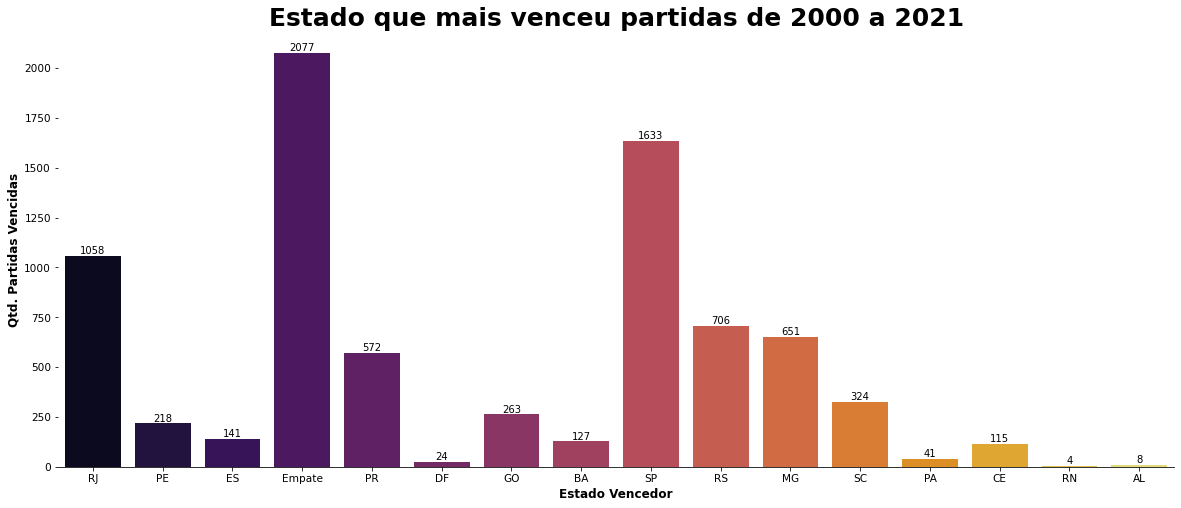

In [23]:
# Plotando gráfico para visualização do estado com maior número de vitórias.
graficoContagemVertical(full_data_norepeat,x='Estado Vencedor',hue=None,palette='inferno',tamanhoFigura=(20,8),titulo='Estado que mais venceu partidas de 2000 a 2021',
                tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=10.5,rotacaoLabelBarra='horizontal')
plt.ylabel('Qtd. Partidas Vencidas',fontdict={'fontsize':12,'fontweight':'semibold'})
plt.xlabel('Estado Vencedor',fontdict={'fontsize':12,'fontweight':'semibold'})
plt.show()

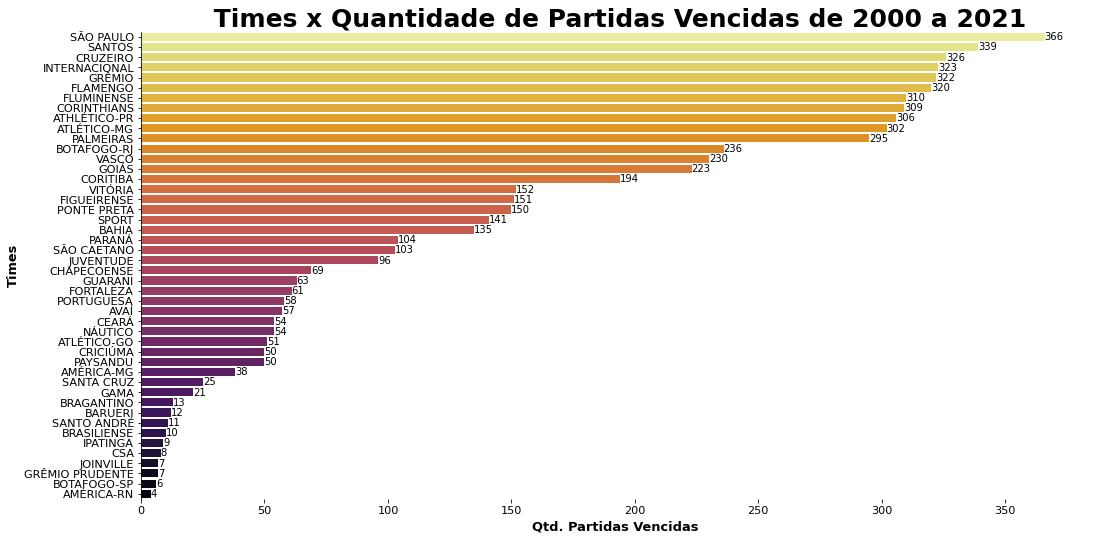

In [24]:
graficoContagemHorizontal(dados=vencedor,y='winners',x='winner_count',hue=None,orientacaoFigura='h',palette='inferno_r',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

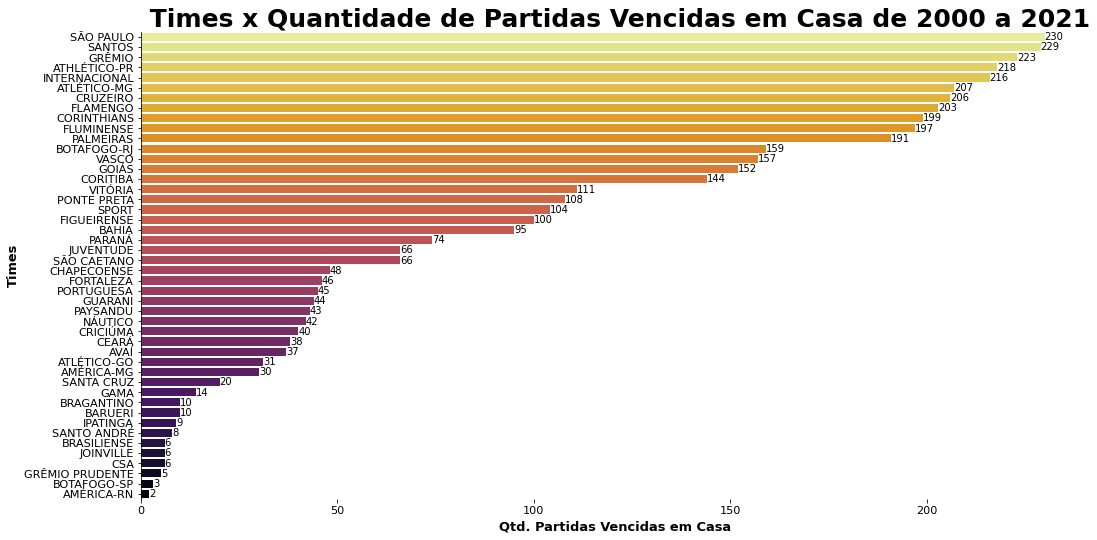

In [25]:
graficoContagemHorizontal(dados=vencedorCasa,y='winners',x='winner_count',hue=None,orientacaoFigura='h',palette='inferno_r',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas em Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas em Casa',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

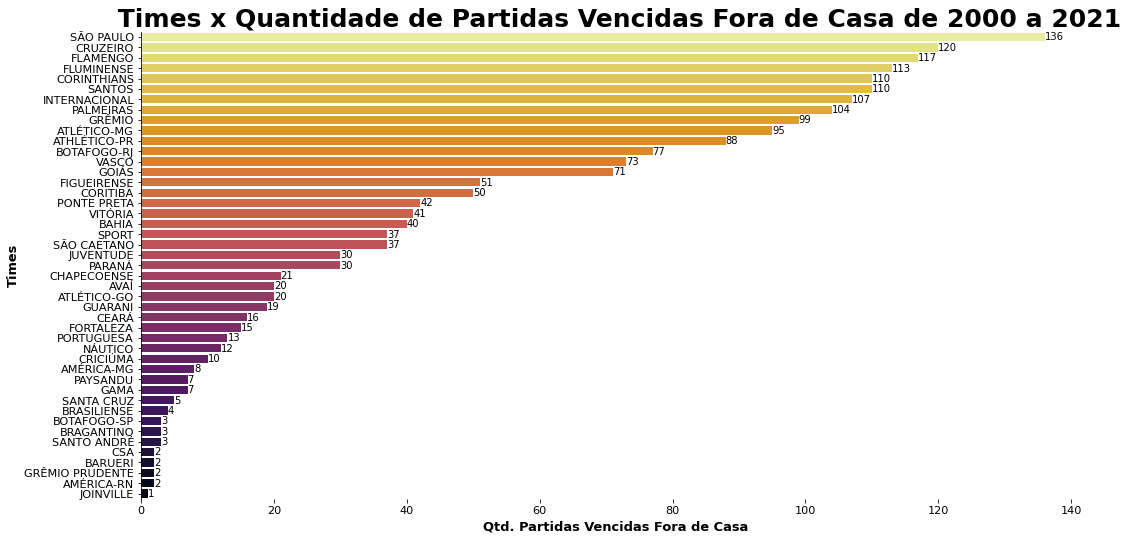

In [26]:
graficoContagemHorizontal(dados=vencedorVisitante,y='winners',x='winner_count',hue=None,orientacaoFigura='h',palette='inferno_r',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas Fora de Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas Fora de Casa',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

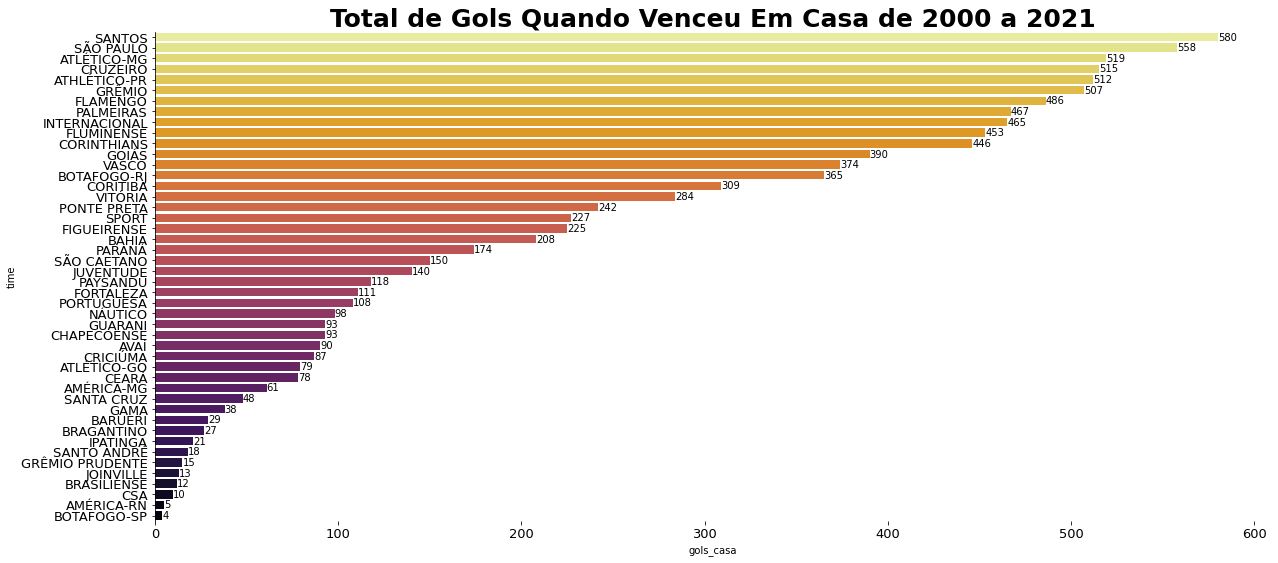

In [27]:
graficoContagemHorizontal(dados=golsMandante,y='time',x='gols_casa',hue=None,orientacaoFigura='h',palette='inferno_r',tamanhoFigura=(20,9),titulo='Total de Gols Quando Venceu Em Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=13)

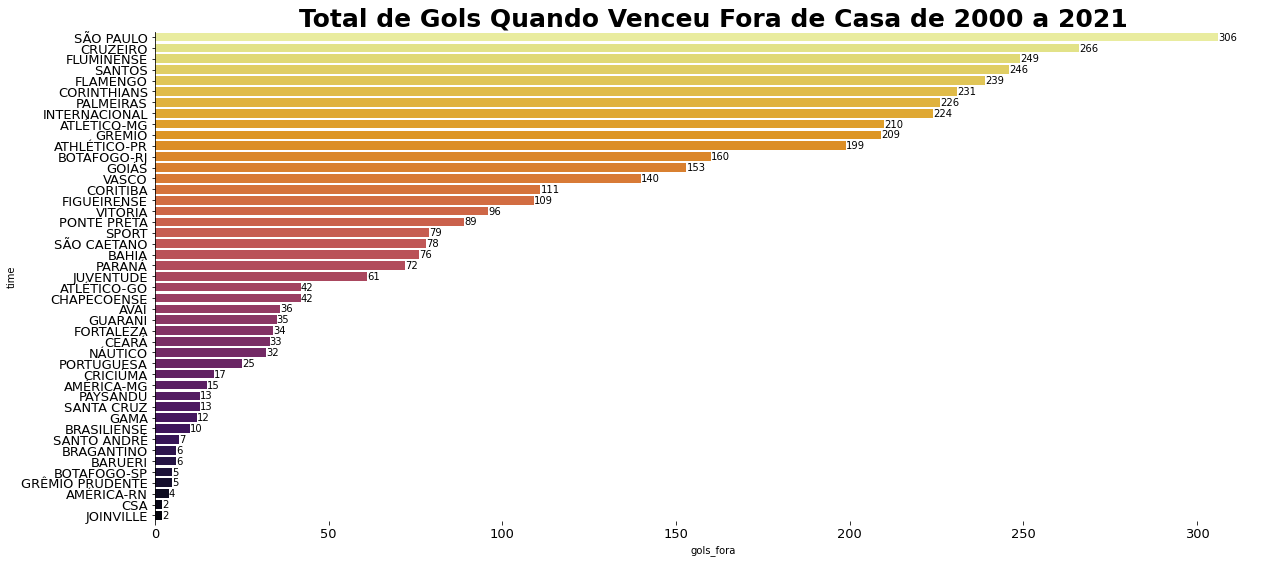

In [28]:
graficoContagemHorizontal(dados=golsVisitante,y='time',x='gols_fora',hue=None,orientacaoFigura='h',palette='inferno_r',tamanhoFigura=(20,9),titulo='Total de Gols Quando Venceu Fora de Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=13)

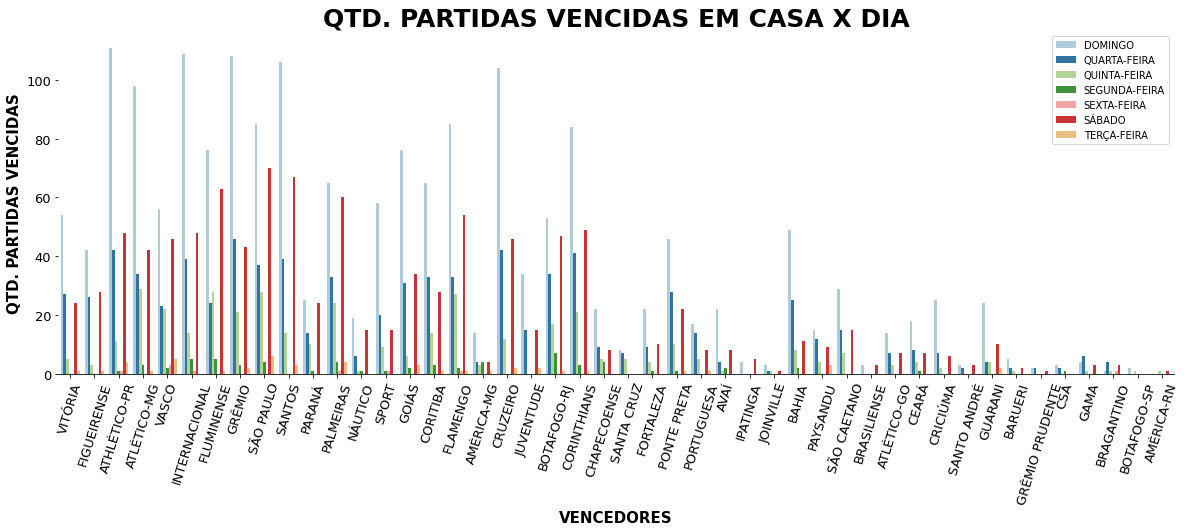

In [29]:
graficoContagemVerticalSemBarValues(dados=homeWinnersDia,x='Vencedor',hue='Dia',palette='Paired',tamanhoFigura=(20,6.3),
                                  titulo='QTD. PARTIDAS VENCIDAS EM CASA X DIA',tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                                  tamanhoTickLabels=13,rotacaoTicks_x=73)
plt.legend(loc='upper right')
plt.xlabel('VENCEDORES',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.ylabel('QTD. PARTIDAS VENCIDAS',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.show()

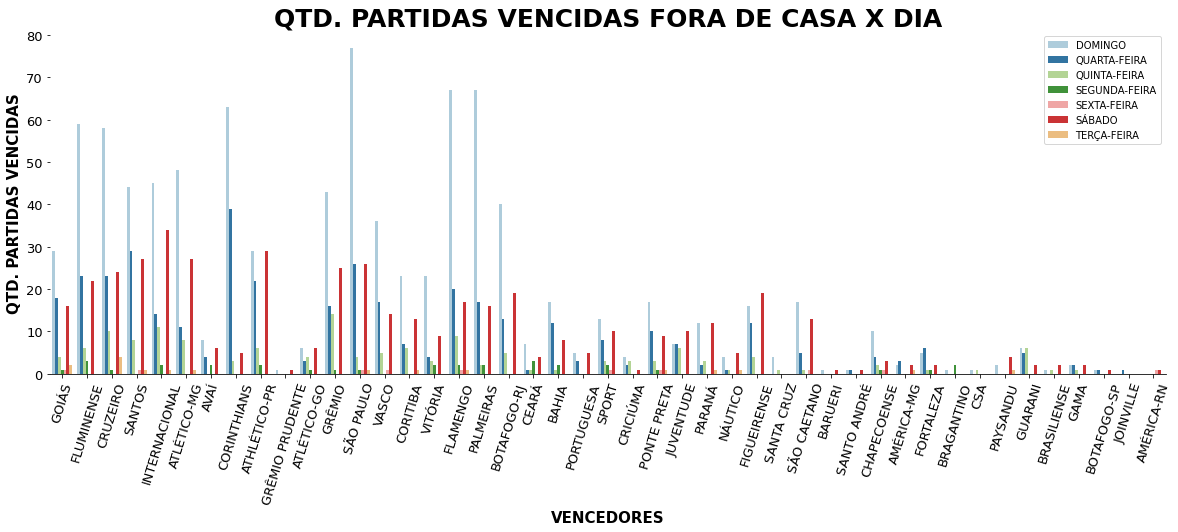

In [30]:
graficoContagemVerticalSemBarValues(dados=awayWinnersDia,x='Vencedor',hue='Dia',palette='Paired',tamanhoFigura=(20,6.3),
                                  titulo='QTD. PARTIDAS VENCIDAS FORA DE CASA X DIA',
                        tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=13,rotacaoTicks_x=73)
plt.legend(loc='upper right')
plt.xlabel('VENCEDORES',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.ylabel('QTD. PARTIDAS VENCIDAS',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.show()

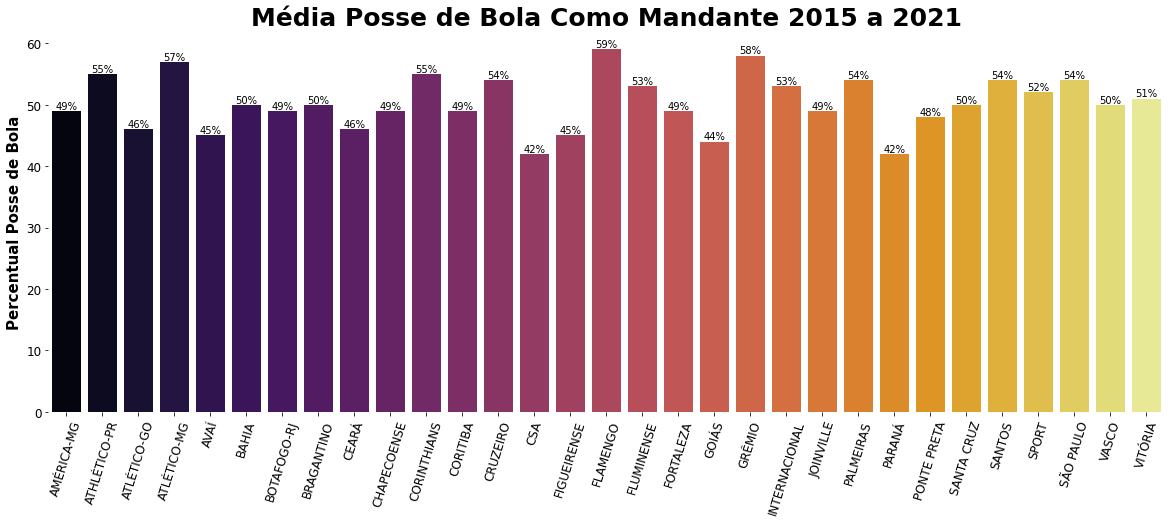

In [31]:
graficoBarrasSimplesComContadorPercentual(dados=posseMandante,x='Time',y='ball_possession',palette='inferno', tamanhoFigura=(20,7),
                                titulo='Média Posse de Bola Como Mandante 2015 a 2021',tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                                xlabel=None,ylabel='Percentual Posse de Bola',tamanhoLabels=15,tipoLabels='semibold',tamanhoTicks=12,rotacaoTicks_x=73)

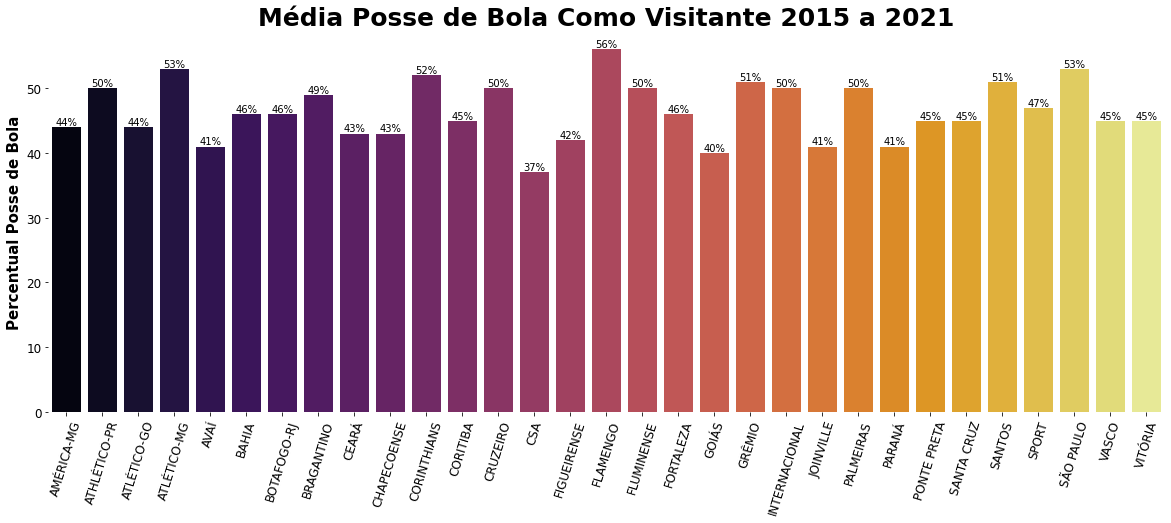

In [32]:
graficoBarrasSimplesComContadorPercentual(dados=posseVisitante,x='Time',y='ball_possession',palette='inferno',tamanhoFigura=(20,7),
                                titulo='Média Posse de Bola Como Visitante 2015 a 2021',tamanhoFonteTitulo=25, tipoFonteTitulo='semibold',
                                xlabel=None,ylabel='Percentual Posse de Bola',tamanhoLabels=15,tipoLabels='semibold',tamanhoTicks=12,rotacaoTicks_x=73)

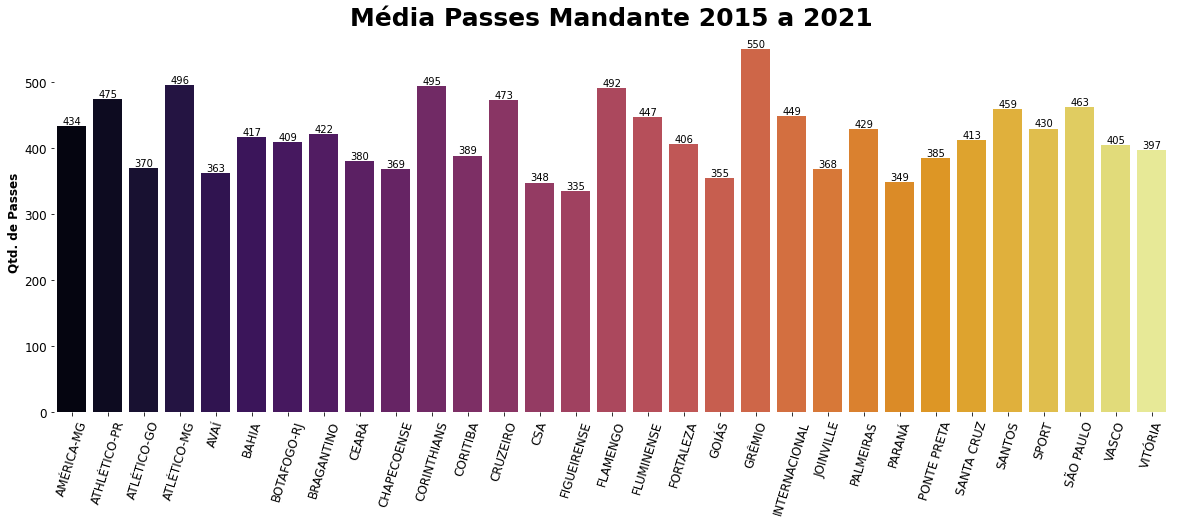

In [33]:
graficoBarrasSimplesComContador(dados=passesMandante,x='Time',hue=None,y='ball_pass',palette='inferno',tamanhoFigura=(20,7),
                                titulo='Média Passes Mandante 2015 a 2021',tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                                xlabel=None,ylabel='Qtd. de Passes',tamanhoLabels=12,tipoLabels='semibold',tamanhoTicks=12,rotacaoTicks_x=73)

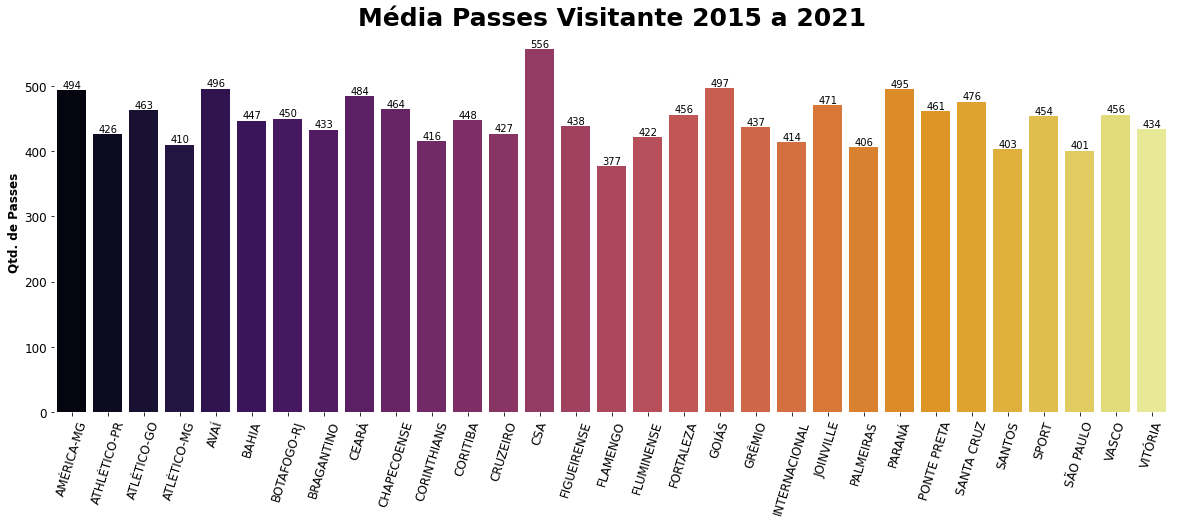

In [34]:
graficoBarrasSimplesComContador(dados=passesVisitante,x='Time',hue=None,y='ball_pass',palette='inferno',tamanhoFigura=(20,7),
                                titulo='Média Passes Visitante 2015 a 2021',tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                                xlabel=None,ylabel='Qtd. de Passes',tamanhoLabels=12,tipoLabels='semibold',tamanhoTicks=12,rotacaoTicks_x=73)

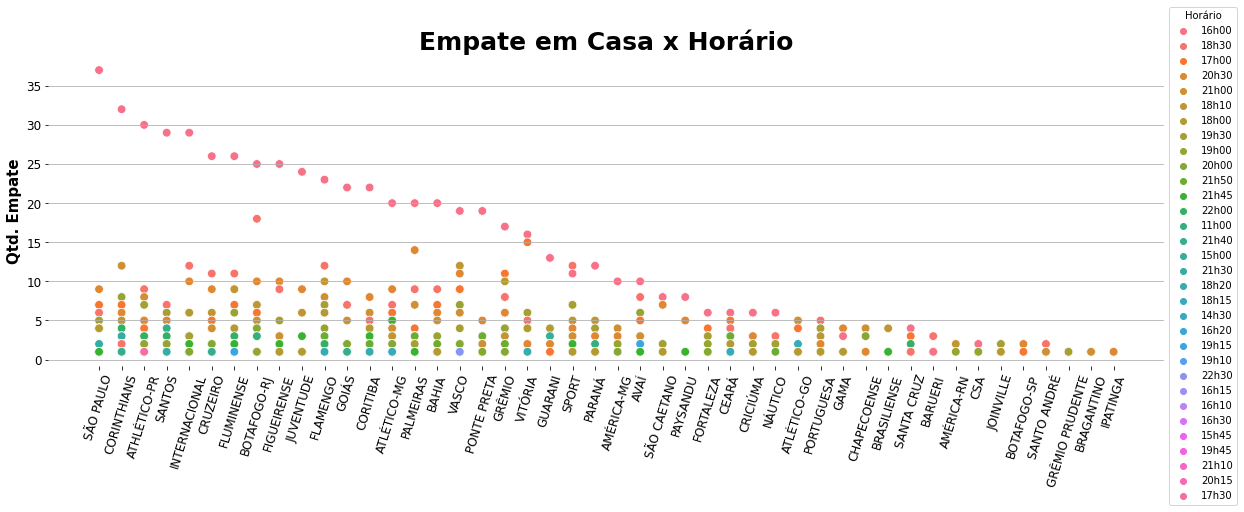

In [35]:
graficoDispercao(dados=empateMandanteHorario,x='time',y='qtd_empate',hue='hora',palette=None,tamanhoFigura=(20,5.7),
                 titulo='Empate em Casa x Horário',tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',xlabel=None,
                 ylabel='Qtd. Empate',tamanhoLabels=15,tipoLabels='semibold',tamanhoTicks=12,rotacaoTicks_x=73,s=75)
plt.legend(title='Horário',bbox_to_anchor=[1,1.175])
plt.grid(axis='y')
plt.show()

In [36]:
# Recebendo dados do vencedor mandante por horário.
vencedorMandanteHorario = vencedorHorario.loc[vencedorHorario['Vencedor'] == vencedorHorario['Mandante_x']]
vencedorMandanteHorario.drop(['Mandante_x','Visitante'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
# efetuando a contagem dos dados e alocando em um . 
vencedorMandanteHorario = vencedorMandanteHorario.value_counts()
vencedorMandanteHorario

Vencedor       Horario
INTERNACIONAL  16h00      79
ATHLÉTICO-PR   16h00      68
SANTOS         16h00      67
GRÊMIO         16h00      67
SÃO PAULO      16h00      58
                          ..
PONTE PRETA    15h30       1
CORINTHIANS    19h15       1
PONTE PRETA    19h15       1
CORINTHIANS    18h15       1
VITÓRIA        22h00       1
Length: 576, dtype: int64

In [38]:
# Buscando os dados de horário, nome de time e quantidade de vitórias dentro do iterável 
# 'vencedorMandanteHorario'
winnerHomeHour = {}
horario = []
time = []
qtd = []
for linha,valor in vencedorMandanteHorario.items() : 
  horario.append(linha[1])
  time.append(linha[0])
  qtd.append(valor)
winnerHomeHour['hora'] = horario
winnerHomeHour['time'] = time
winnerHomeHour['qtd_vitoria'] = qtd
# Transformando em um dataset .
vencedorMandanteHorario = pd.DataFrame.from_dict(winnerHomeHour)

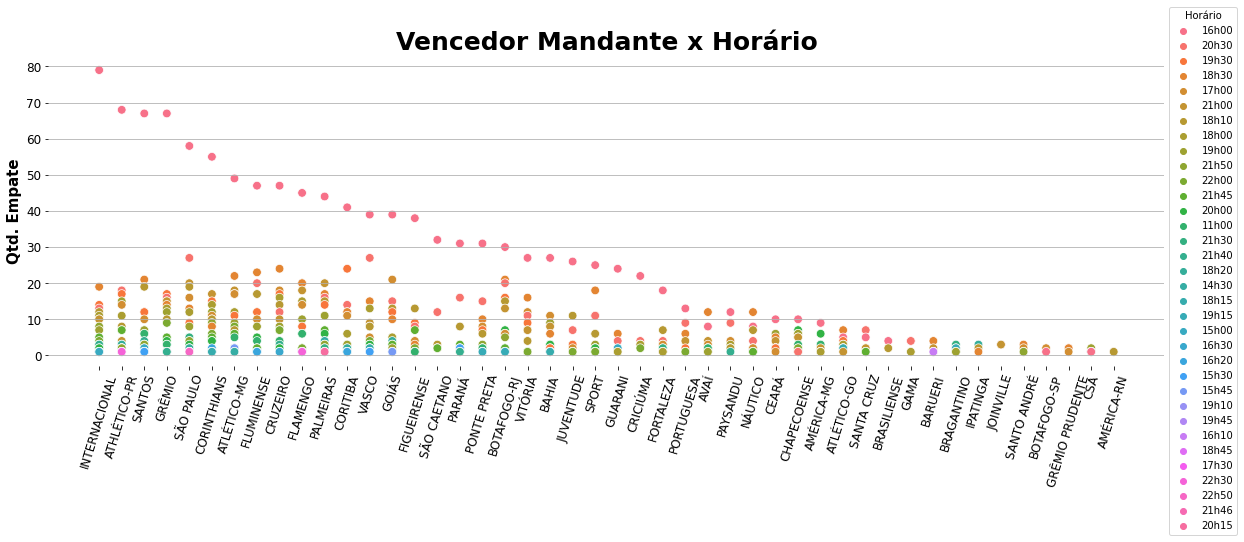

In [39]:
graficoDispercao(dados=vencedorMandanteHorario,x='time',y='qtd_vitoria',hue='hora',palette=None,tamanhoFigura=(20,5.7),
                 titulo='Vencedor Mandante x Horário',tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',xlabel=None,
                 ylabel='Qtd. Empate',tamanhoLabels=15,tipoLabels='semibold',tamanhoTicks=12,rotacaoTicks_x=73,s=75)
plt.legend(title='Horário',bbox_to_anchor=[1,1.175])
plt.grid(axis='y')
plt.show()

In [40]:
vencedorVisitanteHorario = vencedorHorario.loc[vencedorHorario['Vencedor'] == vencedorHorario['Visitante']]
vencedorVisitanteHorario.drop(['Mandante_x','Visitante'],axis=1,inplace=True)
vencedorVisitanteHorario = vencedorVisitanteHorario.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
winnerAwayHour = {}
horario =[]
time = []
qtd = []
for linha, valor in vencedorVisitanteHorario.items() :
  horario.append(linha[1])
  time.append(linha[0])
  qtd.append(valor)
winnerAwayHour['hora'] = horario
winnerAwayHour['time'] = time
winnerAwayHour['qtd_vitoria'] = qtd
vencedorVisitanteHorario = pd.DataFrame.from_dict(winnerAwayHour)
vencedorVisitanteHorario

,hora,time,qtd_vitoria
0,16h00,CORINTHIANS,46
1,16h00,SÃO PAULO,45
2,16h00,PALMEIRAS,42
3,16h00,FLAMENGO,38
4,16h00,CRUZEIRO,37
...,...,...,...
438,15h00,GOIÁS,1
439,14h30,GOIÁS,1
440,11h00,GOIÁS,1
441,20h30,GAMA,1


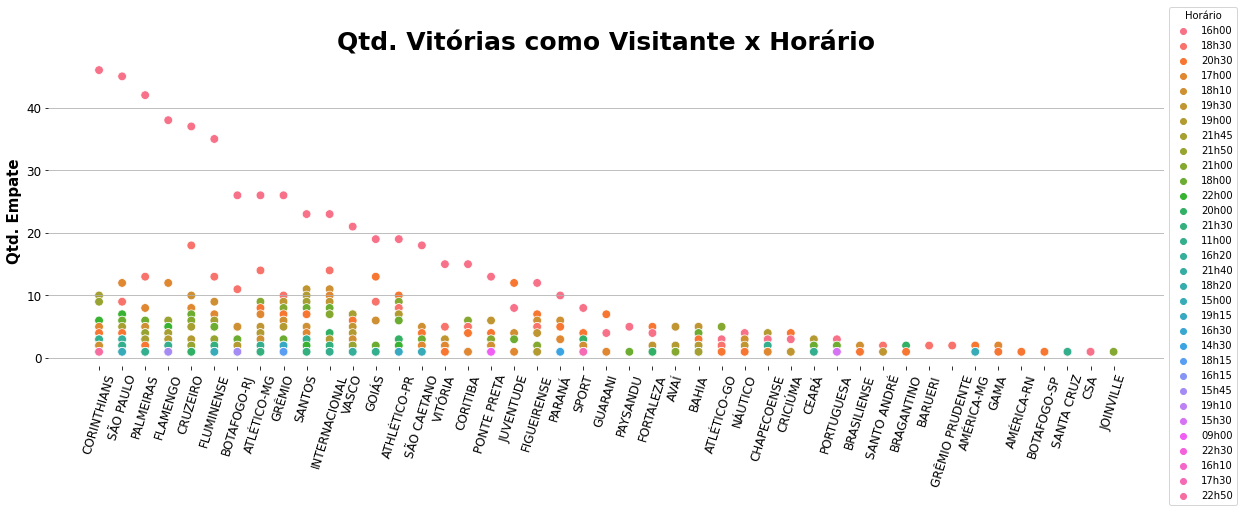

In [42]:
graficoDispercao(dados=vencedorVisitanteHorario,x='time',y='qtd_vitoria',hue='hora',palette=None,tamanhoFigura=(20,5.7),
                 titulo='Qtd. Vitórias como Visitante x Horário',tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',xlabel=None,
                 ylabel='Qtd. Empate',tamanhoLabels=15,tipoLabels='semibold',tamanhoTicks=12,rotacaoTicks_x=73,s=75)
plt.legend(title='Horário',bbox_to_anchor=[1,1.175])
plt.grid(axis='y')
plt.show()

#### Preparando os dados para usar Machine Learning na predição de vencedor.

In [43]:
# Verificando as colunas do dataset, tentando validar qual poderá ser usada para os modelos.
full_data_norepeat.columns

Index(['ID', 'Rodada', 'Data', 'Horário', 'Dia', 'Mandante_x', 'Visitante',
       'Vencedor', 'Arena', 'Mandante Placar', 'Visitante Placar',
       'Estado Mandante', 'Estado Visitante', 'Estado Vencedor', 'Mandante_y',
       'Chutes', 'Chutes a gol', 'Posse de bola', 'Passes',
       'Precisão de passe', 'Faltas', 'Cartões amarelos', 'Cartões vermelhos',
       'Impedimentos', 'Escanteios'],
      dtype='object')

In [44]:
# Retirando os dados de empate para balancear melhor os dados.
full_data_test = full_data_norepeat.loc[full_data_norepeat['Estado Vencedor'] != 'Empate']
# Filtrando apenas as colunas desejadas.
x = full_data_test[['Horário','Dia','Arena','Mandante_x','Visitante','Estado Mandante',
                                           'Estado Visitante']]
# Criando a target.
y = full_data_test['Vencedor']

In [45]:
# Transformando as colunas, em valores numéricos para os modelos aceitarem melhor.
x = pd.get_dummies(x,columns=['Horário','Dia','Mandante_x','Visitante','Arena','Estado Mandante',
                                           'Estado Visitante'])

In [47]:
# importando as bibliotecas que serão usadas . 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
SEED = 42 
np.random.seed(SEED)
X_treino,X_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.33, random_state=SEED)

In [48]:
# Usando KFold para a mistura dos dados de treino . 
cv = KFold(n_splits=5,shuffle=True)

#### Testando os modelos de ML

In [54]:
# Passando e treinando os modelos de Machine Learning . 
modelo_svc = SVC()
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=100)
modeloArvoreDecisao = DecisionTreeClassifier(max_depth=40)
modeloRegressaoLogistica = LogisticRegression(solver='liblinear')
modelos = [modeloRegressaoLogistica, modelo_svc, modeloFlorestaAleatoria, modeloArvoreDecisao]
nome = ['Regressão Logística', 'SVC', 
         'Floresta Aleatória','Arvore Decisão']
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
cont = 0
for item in modelos:
    
    resultados = cross_val_score(item, X_treino, y_treino, cv = cv, 
                              scoring = 'accuracy')
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(nome[cont], media*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(nome[cont], 
                  (media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
    cont += 1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Acurácia média - Modelo Regressão Logística: 66.92%
Intervalo de acurácia - Modelo Regressão Logística: [62.57% ~ 71.28%]



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Acurácia média - Modelo SVC: 63.90%
Intervalo de acurácia - Modelo SVC: [61.13% ~ 66.67%]



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Acurácia média - Modelo Floresta Aleatória: 65.09%
Intervalo de acurácia - Modelo Floresta Aleatória: [62.41% ~ 67.78%]



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Acurácia média - Modelo Arvore Decisão: 57.41%
Intervalo de acurácia - Modelo Arvore Decisão: [56.11% ~ 58.70%]



In [98]:
# Criando função para determinar a precisão do modelo.
# precisão defini-se quando há o acerto verdadeiro.
def intervalo_precisao(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Precisão média: {:.2f}%'.format(media*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
modeloRegressaoLogistica = LogisticRegression(solver='liblinear')
resultados = cross_val_score(modeloRegressaoLogistica, X_treino, y_treino, cv = cv, 
                          scoring='precision_weighted')
intervalo_precisao(resultados)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

Precisão média: 66.80%
Intervalo de Precisão: [62.18% ~ 71.41%]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
def intervalo_recall(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Recall médio: {:.2f}%'.format(media*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits =5, shuffle = True)
modeloRegressaoLogistica = LogisticRegression(solver='liblinear')
resultados = cross_val_score(modeloRegressaoLogistica, X_treino, y_treino, cv = cv, scoring = 'recall_weighted')
intervalo_recall(resultados)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Recall médio: 66.92%
Intervalo de Recall: [62.57% ~ 71.28%]
